### 1. Collect the data

In [132]:
import pandas as pd

linkWiki="https://en.wikipedia.org/wiki/Democracy_Index"
democracy=pd.read_html(linkWiki, header=0,attrs={"class":"wikitable sortable"})[4]

linkmil="https://www.cia.gov/the-world-factbook/field/military-expenditures/country-comparison"

milimoney=pd.read_html(linkmil)[0]

linkHDI="https://github.com/UW-eScience-WinterSchool/Python_Session/raw/main/countryCodesHDI.xlsx"
hdidata=pd.read_excel(linkHDI)

### 2. Check column names

In [133]:
democracy.columns

Index(['Rank',
       '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank',
       'Country', 'Regime type', 'Overall score', 'Δ Score',
       'Elec­toral pro­cess and plura­lism', 'Func­tioning of govern­ment',
       'Poli­tical partici­pation', 'Poli­tical cul­ture', 'Civil liber­ties'],
      dtype='object')

In [134]:
milimoney.columns

Index(['Rank', 'Country', '% of GDP', 'Date of Information'], dtype='object')

In [135]:
hdidata.columns

Index(['FIPS', 'ISO2', 'ISO3', 'NAME', 'HDI'], dtype='object')

You checked column names to name the key columns for merge, and to get rid of columns that may bring trouble.

In [136]:
# this renaming will make merge easier
hdidata.rename(columns={'NAME':"Country"},inplace=True)

In [137]:
# merge will likely use "Rank" as the key (leftmost common variable), so get rid of it before it happens:
democracy.drop(columns=["Rank"],inplace=True)
milimoney.drop(columns=["Rank"],inplace=True)

## 3. Fuzzy merge

Check how many countries are present:

In [138]:
DemoCountryAll=set(democracy.Country)
len(DemoCountryAll)

171

In [139]:
MiliCountryAll=set(milimoney.Country)
len(MiliCountryAll)

166

In [140]:
HdiCountryAll=set(hdidata.Country)
len(HdiCountryAll)

246

At least, we should have around 166 countries. However, in common we have now:

In [141]:
len(DemoCountryAll.intersection(MiliCountryAll).intersection(HdiCountryAll))

143

Let's make _MiliCountryAll_ the main country name source, then find out which are not matching from that list:

In [142]:
# in MiliCountry that are not in DemoCountryAll
MiliYes_DemoNo=MiliCountryAll.difference(DemoCountryAll)
MiliYes_DemoNo

{'Bahamas, The',
 'Barbados',
 'Belize',
 'Brunei',
 'Burma',
 'Cabo Verde',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 "Cote d'Ivoire",
 'Czechia',
 'Gambia, The',
 'Korea, South',
 'Kosovo',
 'Seychelles',
 'Somalia',
 'South Sudan'}

In [143]:
DemoYes_MiliNo=DemoCountryAll.difference(MiliCountryAll)
DemoYes_MiliNo

{'Authoritarian regimes',
 'Bhutan',
 'Cape Verde',
 'Comoros',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Flawed democracies',
 'Full democracies',
 'Gambia',
 'Haiti',
 'Hong Kong',
 'Hybrid regimes',
 'Iceland',
 'Ivory Coast',
 'Libya',
 'Myanmar',
 'North Korea',
 'Palestine',
 'Republic of the Congo',
 'South Korea',
 'Syria'}

In [144]:
from thefuzz import process
{mili:process.extractOne(mili,DemoYes_MiliNo)[0] for mili in sorted(MiliYes_DemoNo)}

{'Bahamas, The': 'Democratic Republic of the Congo',
 'Barbados': 'Gambia',
 'Belize': 'Czech Republic',
 'Brunei': 'Bhutan',
 'Burma': 'Bhutan',
 'Cabo Verde': 'Cape Verde',
 'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
 'Congo, Republic of the': 'Democratic Republic of the Congo',
 "Cote d'Ivoire": 'Ivory Coast',
 'Czechia': 'Czech Republic',
 'Gambia, The': 'Gambia',
 'Korea, South': 'South Korea',
 'Kosovo': 'Comoros',
 'Seychelles': 'Czech Republic',
 'Somalia': 'Libya',
 'South Sudan': 'South Korea'}

There are some that can be recovered. Let's prepare the dict:

In [145]:
goodDemo={
    #'Bahamas, The': 'Democratic Republic of the Congo',
# 'Barbados': 'Gambia',
# 'Belize': 'Czech Republic',
# 'Brunei': 'Bhutan',
# 'Burma': 'Bhutan',
 'Cabo Verde': 'Cape Verde',
 'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
 'Congo, Republic of the': 'Republic of the Congo', #manual
 "Cote d'Ivoire": 'Ivory Coast',
 'Czechia': 'Czech Republic',
 'Gambia, The': 'Gambia',
 'Korea, South': 'South Korea'
# 'Kosovo': 'Comoros',
# 'Seychelles': 'Czech Republic',
# 'Somalia': 'Libya',
# 'South Sudan': 'South Korea'
}

In [146]:
milimoney.Country.replace(goodDemo,inplace=True)

We can do the first merge:

In [147]:
allmerged=democracy.merge(milimoney)
allmerged

,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank,Country,Regime type,Overall score,Δ Score,Elec­toral pro­cess and plura­lism,Func­tioning of govern­ment,Poli­tical partici­pation,Poli­tical cul­ture,Civil liber­ties,% of GDP,Date of Information
0,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41,1.85,2021 est.
1,NaN,Sweden,Full democracy,9.26,0.13,9.58,9.29,8.33,10.00,9.12,1.40,2021 est.
2,NaN,New Zealand,Full democracy,9.25,0.01,10.00,8.93,8.89,8.75,9.71,1.50,2020
3,2,Canada,Full democracy,9.24,0.02,9.58,8.93,8.89,9.38,9.41,1.39,2021 est.
4,1,Finland,Full democracy,9.20,0.05,10.00,8.93,8.89,8.75,9.41,2.10,2021 est.
...,...,...,...,...,...,...,...,...,...,...,...,...
152,6,Laos,Authoritarian,1.77,0.37,0.00,2.86,1.67,3.75,0.59,0.20,2017 est.
153,NaN,Turkmenistan,Authoritarian,1.72,NaN,0.00,0.79,2.22,5.00,0.59,0.90,2020 est.
154,NaN,Chad,Authoritarian,1.55,0.06,0.00,0.00,1.67,3.75,2.35,2.90,2020 est.
155,NaN,Central African Republic,Authoritarian,1.32,NaN,1.25,0.00,1.11,1.88,2.35,1.80,2020 est.


Now, with some new names, let's go to the other data frame:

In [148]:
allmergedCountryAll=set(allmerged.Country)

# in MiliCountry that are not in HdiCountryAll
allmergedYes_HdiNo=allmergedCountryAll.difference(HdiCountryAll)
HdiYes_allmergedNo=HdiCountryAll.difference(allmergedCountryAll)

In [149]:
{allmr:process.extractOne(allmr,HdiYes_allmergedNo)[0] for allmr in sorted(allmergedYes_HdiNo)}

{'Eswatini': 'Palestine',
 'Iran': 'Iran (Islamic Republic of)',
 'Ivory Coast': "Cote d'Ivoire",
 'Laos': "Lao People's Democratic Republic",
 'Moldova': 'Republic of Moldova',
 'North Macedonia': 'The former Yugoslav Republic of Macedonia',
 'Republic of the Congo': 'Congo',
 'South Korea': 'Korea, Republic of',
 'Tanzania': 'United Republic of Tanzania',
 'Vietnam': 'Viet Nam'}

In [150]:
#selecting
hdiGood={'Eswatini': 'Swaziland',
 'Iran': 'Iran (Islamic Republic of)',
 'Ivory Coast': "Cote d'Ivoire",
 'Laos': "Lao People's Democratic Republic", # manual
 'Moldova': 'Republic of Moldova',
 'North Macedonia': 'The former Yugoslav Republic of Macedonia',
 'Republic of the Congo': 'Congo',
 'South Korea': 'Korea, Republic of',#manual
 'Tanzania': 'United Republic of Tanzania',
 'Vietnam': 'Viet Nam'}

The changes would be better if we change in the HDI data:

In [151]:
hdiGood_Change={v:k for k,v in hdiGood.items()}
hdiGood_Change

{'Swaziland': 'Eswatini',
 'Iran (Islamic Republic of)': 'Iran',
 "Cote d'Ivoire": 'Ivory Coast',
 "Lao People's Democratic Republic": 'Laos',
 'Republic of Moldova': 'Moldova',
 'The former Yugoslav Republic of Macedonia': 'North Macedonia',
 'Congo': 'Republic of the Congo',
 'Korea, Republic of': 'South Korea',
 'United Republic of Tanzania': 'Tanzania',
 'Viet Nam': 'Vietnam'}

Then,

In [152]:
hdidata.Country.replace(hdiGood_Change,inplace=True)


In [153]:
allmerged=allmerged.merge(hdidata)
allmerged

,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank,Country,Regime type,Overall score,Δ Score,Elec­toral pro­cess and plura­lism,Func­tioning of govern­ment,Poli­tical partici­pation,Poli­tical cul­ture,Civil liber­ties,% of GDP,Date of Information,FIPS,ISO2,ISO3,HDI
0,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41,1.85,2021 est.,NO,NO,NOR,0.957
1,NaN,Sweden,Full democracy,9.26,0.13,9.58,9.29,8.33,10.00,9.12,1.40,2021 est.,SW,SE,SWE,0.945
2,NaN,New Zealand,Full democracy,9.25,0.01,10.00,8.93,8.89,8.75,9.71,1.50,2020,NZ,NZ,NZL,0.931
3,2,Canada,Full democracy,9.24,0.02,9.58,8.93,8.89,9.38,9.41,1.39,2021 est.,CA,CA,CAN,0.929
4,1,Finland,Full democracy,9.20,0.05,10.00,8.93,8.89,8.75,9.41,2.10,2021 est.,FI,FI,FIN,0.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,6,Laos,Authoritarian,1.77,0.37,0.00,2.86,1.67,3.75,0.59,0.20,2017 est.,LA,LA,LAO,0.613
153,NaN,Turkmenistan,Authoritarian,1.72,NaN,0.00,0.79,2.22,5.00,0.59,0.90,2020 est.,TX,TM,TKM,0.715
154,NaN,Chad,Authoritarian,1.55,0.06,0.00,0.00,1.67,3.75,2.35,2.90,2020 est.,CD,TD,TCD,0.398
155,NaN,Central African Republic,Authoritarian,1.32,NaN,1.25,0.00,1.11,1.88,2.35,1.80,2020 est.,CT,CF,CAF,0.397


### 4. Preprocessing

* _Check the strings in column names_:

In [154]:
allmerged.columns.to_list()

['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank',
 'Country',
 'Regime type',
 'Overall score',
 'Δ Score',
 'Elec\xadtoral pro\xadcess and plura\xadlism',
 'Func\xadtioning of govern\xadment',
 'Poli\xadtical partici\xadpation',
 'Poli\xadtical cul\xadture',
 'Civil liber\xadties',
 '% of GDP',
 'Date of Information',
 'FIPS',
 'ISO2',
 'ISO3',
 'HDI']

* _Clean strings_:

In [155]:
#replace '%' by "share"
allmerged.columns=allmerged.columns.str.replace("\%","share",regex=True)
#replace 'spaces' by "_"
allmerged.columns=allmerged.columns.str.replace("\s","_",regex=True)
#replace 'whatever is not a character' by ""
allmerged.columns=allmerged.columns.str.replace("\W","",regex=True)
#current names
allmerged.columns.to_list()

['mwparseroutput_tooltipdottedborderbottom1px_dottedcursorhelpΔ_Rank',
 'Country',
 'Regime_type',
 'Overall_score',
 'Δ_Score',
 'Electoral_process_and_pluralism',
 'Functioning_of_government',
 'Political_participation',
 'Political_culture',
 'Civil_liberties',
 'share_of_GDP',
 'Date_of_Information',
 'FIPS',
 'ISO2',
 'ISO3',
 'HDI']

* _Drop MORE unneeded columns_:

In [156]:
#take a look:
allmerged.columns[allmerged.columns.str.contains("Rank|Date|Δ",regex=True)]

Index(['mwparseroutput_tooltipdottedborderbottom1px_dottedcursorhelpΔ_Rank',
       'Δ_Score', 'Date_of_Information'],
      dtype='object')

In [157]:
#save column to drop
toDrop=allmerged.columns[allmerged.columns.str.contains("Rank|Date|Δ",regex=True)]
# drop them
allmerged.drop(columns=toDrop,inplace=True)
# see result
allmerged

,Country,Regime_type,Overall_score,Electoral_process_and_pluralism,Functioning_of_government,Political_participation,Political_culture,Civil_liberties,share_of_GDP,FIPS,ISO2,ISO3,HDI
0,Norway,Full democracy,9.81,10.00,9.64,10.00,10.00,9.41,1.85,NO,NO,NOR,0.957
1,Sweden,Full democracy,9.26,9.58,9.29,8.33,10.00,9.12,1.40,SW,SE,SWE,0.945
2,New Zealand,Full democracy,9.25,10.00,8.93,8.89,8.75,9.71,1.50,NZ,NZ,NZL,0.931
3,Canada,Full democracy,9.24,9.58,8.93,8.89,9.38,9.41,1.39,CA,CA,CAN,0.929
4,Finland,Full democracy,9.20,10.00,8.93,8.89,8.75,9.41,2.10,FI,FI,FIN,0.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Laos,Authoritarian,1.77,0.00,2.86,1.67,3.75,0.59,0.20,LA,LA,LAO,0.613
153,Turkmenistan,Authoritarian,1.72,0.00,0.79,2.22,5.00,0.59,0.90,TX,TM,TKM,0.715
154,Chad,Authoritarian,1.55,0.00,0.00,1.67,3.75,2.35,2.90,CD,TD,TCD,0.398
155,Central African Republic,Authoritarian,1.32,1.25,0.00,1.11,1.88,2.35,1.80,CT,CF,CAF,0.397


* _Look for missing values and check for wrong data types_:

In [158]:
allmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          157 non-null    object 
 1   Regime_type                      157 non-null    object 
 2   Overall_score                    157 non-null    object 
 3   Electoral_process_and_pluralism  157 non-null    object 
 4   Functioning_of_government        157 non-null    object 
 5   Political_participation          157 non-null    object 
 6   Political_culture                157 non-null    object 
 7   Civil_liberties                  157 non-null    object 
 8   share_of_GDP                     157 non-null    float64
 9   FIPS                             157 non-null    object 
 10  ISO2                             156 non-null    object 
 11  ISO3                             157 non-null    object 
 12  HDI                   

a. Some missing values can be corrected, others cannot:

In [159]:
allmerged[allmerged.isnull().any(axis=1)]

,Country,Regime_type,Overall_score,Electoral_process_and_pluralism,Functioning_of_government,Political_participation,Political_culture,Civil_liberties,share_of_GDP,FIPS,ISO2,ISO3,HDI
9,Taiwan,Full democracy,8.94,10.00,9.64,7.22,8.13,9.71,2.1,TW,TW,TWN,NaN
56,Namibia,Flawed democracy,6.52,7.00,5.36,6.67,5.63,7.94,3.4,WA,NaN,NAM,0.646


We can not use Taiwan, but Namibia can be kept.

In [160]:
allmerged.loc[pd.isnull(allmerged.ISO2),'ISO2']='NA'

Dropping rows with missing values:

In [161]:
allmerged.dropna(inplace=True)
allmerged.reset_index(drop=True,inplace=True)
allmerged

,Country,Regime_type,Overall_score,Electoral_process_and_pluralism,Functioning_of_government,Political_participation,Political_culture,Civil_liberties,share_of_GDP,FIPS,ISO2,ISO3,HDI
0,Norway,Full democracy,9.81,10.00,9.64,10.00,10.00,9.41,1.85,NO,NO,NOR,0.957
1,Sweden,Full democracy,9.26,9.58,9.29,8.33,10.00,9.12,1.40,SW,SE,SWE,0.945
2,New Zealand,Full democracy,9.25,10.00,8.93,8.89,8.75,9.71,1.50,NZ,NZ,NZL,0.931
3,Canada,Full democracy,9.24,9.58,8.93,8.89,9.38,9.41,1.39,CA,CA,CAN,0.929
4,Finland,Full democracy,9.20,10.00,8.93,8.89,8.75,9.41,2.10,FI,FI,FIN,0.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Laos,Authoritarian,1.77,0.00,2.86,1.67,3.75,0.59,0.20,LA,LA,LAO,0.613
152,Turkmenistan,Authoritarian,1.72,0.00,0.79,2.22,5.00,0.59,0.90,TX,TM,TKM,0.715
153,Chad,Authoritarian,1.55,0.00,0.00,1.67,3.75,2.35,2.90,CD,TD,TCD,0.398
154,Central African Republic,Authoritarian,1.32,1.25,0.00,1.11,1.88,2.35,1.80,CT,CF,CAF,0.397


b. Convert string to numerical

In [162]:
toNumeric=['Overall_score',
 'Electoral_process_and_pluralism', 
 'Functioning_of_government',
 'Political_participation', 'Political_culture', 'Civil_liberties']
allmerged.loc[:,toNumeric]=allmerged.loc[:,toNumeric].apply(lambda x: pd.to_numeric(x))

c. Check ordinal variable:

In [163]:
#check levels:
set(allmerged.Regime_type)

{'Authoritarian', 'Flawed democracy', 'Full democracy', 'Hybrid regime'}

In [164]:
levels=['Authoritarian', 'Hybrid regime','Flawed democracy', 'Full democracy']
allmerged.Regime_type=pd.Categorical(allmerged.Regime_type,
                                     categories=levels,
                                     ordered=True)

In [165]:
allmerged.Regime_type

0      Full democracy
1      Full democracy
2      Full democracy
3      Full democracy
4      Full democracy
            ...      
151     Authoritarian
152     Authoritarian
153     Authoritarian
154     Authoritarian
155     Authoritarian
Name: Regime_type, Length: 156, dtype: category
Categories (4, object): ['Authoritarian' < 'Hybrid regime' < 'Flawed democracy' < 'Full democracy']

In [166]:
# review:
allmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          156 non-null    object  
 1   Regime_type                      156 non-null    category
 2   Overall_score                    156 non-null    float64 
 3   Electoral_process_and_pluralism  156 non-null    float64 
 4   Functioning_of_government        156 non-null    float64 
 5   Political_participation          156 non-null    float64 
 6   Political_culture                156 non-null    float64 
 7   Civil_liberties                  156 non-null    float64 
 8   share_of_GDP                     156 non-null    float64 
 9   FIPS                             156 non-null    object  
 10  ISO2                             156 non-null    object  
 11  ISO3                             156 non-null    object  
 12  HDI     

Let's give better names to the main indices:

In [167]:
LastNamesChanges={'Overall_score':'DemoIndex','share_of_GDP':'DefenseIndex','HDI':"HDIndex"}
allmerged.rename(columns=LastNamesChanges,inplace=True)

In [168]:
allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]].describe()

,DemoIndex,DefenseIndex,HDIndex
count,156.000000,156.000000,156.000000
mean,5.439231,1.973462,0.723115
std,2.203342,1.533499,0.155041
min,1.130000,0.200000,0.394000
25%,3.362500,1.015000,0.593500
50%,5.775000,1.520000,0.746000
75%,7.137500,2.325000,0.851000
max,9.810000,11.000000,0.957000


In [169]:
#!pip install seaborn

<AxesSubplot:>

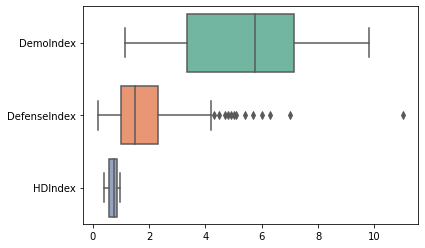

In [170]:
import seaborn as sbn

sbn.boxplot(data=allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]], orient="h", palette="Set2")

<AxesSubplot:>

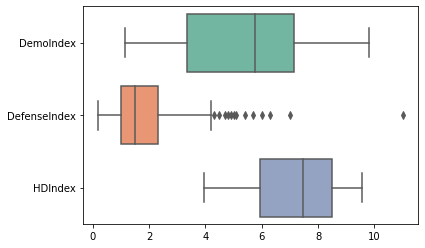

In [171]:
allmerged.HDIndex=10*allmerged.HDIndex
sbn.boxplot(data=allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]], orient="h", palette="Set2")

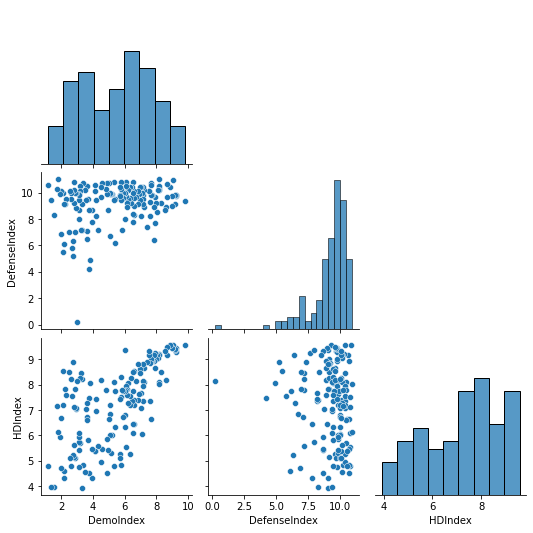

In [176]:
sbn.pairplot(allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]], corner=True)

In [173]:
allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]].corr()

,DemoIndex,DefenseIndex,HDIndex
DemoIndex,1.000000,-0.249164,0.655845
DefenseIndex,-0.249164,1.000000,0.095492
HDIndex,0.655845,0.095492,1.000000


In [174]:
allmerged.DefenseIndex=-1*((allmerged.DefenseIndex-allmerged.DefenseIndex.max()))+allmerged.DefenseIndex.min()
allmerged.DefenseIndex.describe()

count    156.000000
mean       9.226538
std        1.533499
min        0.200000
25%        8.875000
50%        9.680000
75%       10.185000
max       11.000000
Name: DefenseIndex, dtype: float64

In [175]:
allmerged.loc[:,['DemoIndex','DefenseIndex',"HDIndex"]].corr()

,DemoIndex,DefenseIndex,HDIndex
DemoIndex,1.000000,0.249164,0.655845
DefenseIndex,0.249164,1.000000,-0.095492
HDIndex,0.655845,-0.095492,1.000000


Also, pay attention to distribution:

### 4. Save your work

* _Save data for R_:

In [177]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(allmerged,file="allmerged_new.rds")

/Users/JoseManuel/anaconda3/envs/WinterSchool/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


<rpy2.rinterface_lib.sexp.NULLType object at 0x7ffcf8b74e40> [RTYPES.NILSXP]